In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [48]:
#Average probs for 0 and 1 for each doc
probs = pickle.load(open('probs.p','rb'))

In [53]:
probs[0:3]

,0,1
doc,,
0,0.484133,0.515867
1,0.573073,0.426927
2,0.261172,0.738828


In [45]:
test1 = pickle.load(open('test1.p','rb'))

In [46]:
print test1.iloc[[0]]

             id  sentiment                                             review
21130  "5706_2"          0  "This movie is like the thousand \"cat and mou...


In [54]:
docs = pickle.load(open('docs.p','rb'))

In [55]:
print docs[0]

[[u'this', u'movie', u'is', u'like', u'the', u'thousand', u'cat', u'and', u'mouse', u'movies', u'that', u'preceded', u'it'], [u'the', u'following', u'may', u'look', u'like', u'a', u'spoiler', u'but', u'it', u'really', u'just', u'describes', u'a', u'large', u'class', u'of', u'movies', u'there', u'is', u'the', u'passionate', u'wise', u'main', u'character', u'his', u'goofy', u'but', u'well', u'meaning', u'sidekick', u'with', u'his', u'ill', u'placed', u'attempts', u'at', u'humorous', u'comments', u'the', u'initially', u'hostile', u'but', u'soon', u'softened', u'gorgeous', u'lady', u'who', u'triggers', u'the', u'inevitable', u'unlikely', u'love', u'story', u'the', u'loved', u'ones', u'taken', u'hostage', u'and', u'of', u'course', u'the', u'careless', u'evil', u'adversary', u'with', u'his', u'brutal', u'minions'], [u'everybody', u'has', u'seen', u'tons', u'of', u'these', u'movies', u'already', u'and', u'national', u'treasure', u'is', u'like', u'any', u'one', u'of', u'them', u'with', u'only'

In [56]:
models = pickle.load(open('models.p','rb'))

In [57]:
probssentences = pickle.load(open('probssentences.p', 'rb'))

In [58]:
probssentences[0:20]

,0,1,doc
0,0.5986,0.4014,0
1,0.00792023,0.99208,0
2,0.369248,0.630752,0
3,0.445318,0.554682,0
4,0.999581,0.000419095,0
5,0.00449226,0.995508,1
6,0.918007,0.0819928,1
7,0.55223,0.44777,1
8,0.986808,0.0131918,1
9,0.721142,0.278858,1


In [59]:
#append the true class value
probssentences["truelabel"] = 0
for i in range(len(probssentences)):
    #get true label value from test1 where index matches doc number
    j = probssentences.iloc[i]['doc']
    probssentences.set_value(i, 'truelabel', test1.iloc[[j]]["sentiment"])

In [73]:
#check that correct true labels were added
#seems like it
print test1[0:10]
print probs[0:10]
print docs[0][0]

              id  sentiment                                             review
21130   "5706_2"          0  "This movie is like the thousand \"cat and mou...
3404   "11132_3"          0  "A documentarist, like any filmmaker, must con...
14560  "10770_7"          1  "With a well thought out cast, this movie was ...
6671   "1058_10"          1  "this is the best sci-fi that I have seen in m...
10982  "12239_1"          0  "Ever since I was eight years old I have been ...
5526     "966_7"          1  "2005 Toronto Film Festival Report It is offic...
19301  "11645_2"          0  "This is a review of 'Freddy Mercury The Untol...
17060   "5920_9"          1  "American icon Henry Fonda portrays \"Elegant\...
24744   "9501_2"          0  "This is the page for \"House of Exorcism\", b...
5253    "7877_4"          0  "The makers of this film have created a future...
             0           1
doc                       
0     0.484133    0.515867
1     0.573073    0.426927
2     0.261172    0.738

In [83]:
#count number of sentences for each review
#also print reviews with the most sentences
#Note: don't think this is the most accurate since these reviews may or may not be better classified for having more sentences
for i in range(len(probs)):
    rows = probssentences.loc[probssentences['doc'] == probs.index.values[i]]
    numrows = rows.shape
    if numrows[0] > 60:
        print probs.index.values[i]

33
738
3987
5239
9041
9559
9836
11675
12458


In [86]:
#average number of sentences per review:
print len(probssentences)/len(probs)

10


In [106]:
#get subsets based on inxs returned above
subset1 = probssentences.loc[probssentences["doc"] == 33]
subset2 = probssentences.loc[probssentences["doc"] == 738]
subset3 = probssentences.loc[probssentences["doc"] == 3987]
subset4 = probssentences.loc[probssentences["doc"] == 5239]
subset5 = probssentences.loc[probssentences["doc"] == 9041]
subset6 = probssentences.loc[probssentences["doc"] == 9559]
subset7 = probssentences.loc[probssentences["doc"] == 9836]
subset8 = probssentences.loc[probssentences["doc"] == 11675]

In [82]:
#testing mistakes: check that none of the docs have blanks. Note* index 12458 does.
#This review goes "smallville episode justice is the best episode of smallville"(tons of blanks)"it is my favorite episode of smallville"(tons of blanks)
#sentence parsing error of some sort
print docs[12458:12459]

[[[u'smallville', u'episode', u'justice', u'is', u'the', u'best', u'episode', u'of', u'smallville'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [u'it', u's', u'my', u'favorite', u'episode', u'of', u'smallville'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [107]:
#check that all subsets are the correct indices
print len(subset1)
print len(subset2)
print len(subset3)
print len(subset4)
print len(subset5)
print len(subset6)
print len(subset7)
print len(subset8)

62
70
86
63
71
118
69
67


## Plot 1 (neg)

In [108]:
print subset1[0:1]

            0         1 doc  truelabel
342  0.833163  0.166837  33          0


In [142]:
#subset to the only column being that of the probabilities for each class
probspos = subset1[[1]]
probsneg = subset1[[0]]

In [161]:
#positive plot 
#note: negative plot is the exact same just opposite (because 0 and 1 prob values are connected and sum to 1)
%matplotlib inline

#pltpos = plt.hist(probspos)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
#plt.axis([0.0,1.0,0.0,3000.0])

[0.0, 1.0, 0.0, 40.0]

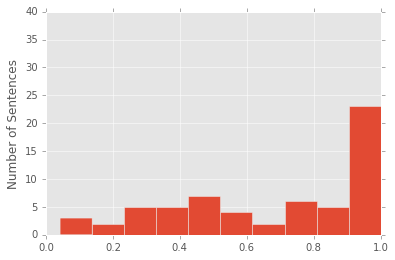

In [143]:
#negative plot
%matplotlib inline

pltneg = plt.hist(probsneg)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Number of Sentences")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 2 (neg)

In [112]:
print subset2[0:1]

             0         1  doc  truelabel
8155  0.614754  0.385246  738          0


In [144]:
#subset to the only column being that of the probabilities of the true label
probsneg = subset2[[0]]

[0.0, 1.0, 0.0, 40.0]

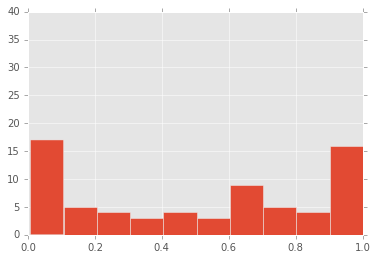

In [145]:
#negative plot
%matplotlib inline

pltneg = plt.hist(probsneg)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 3 (neg)

In [117]:
print subset3[0:1]

               0         1   doc  truelabel
42811  0.0853548  0.914645  3987          0


In [146]:
#subset to the only column being that of the probabilities of the true label
probspos = subset3[[0]]

[0.0, 1.0, 0.0, 40.0]

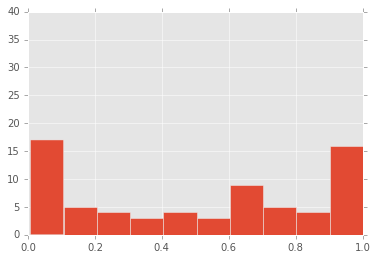

In [147]:
#negative plot
%matplotlib inline

pltneg = plt.hist(probsneg)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 4 (pos)

In [120]:
print subset4[0:1]

              0         1   doc  truelabel
56468  0.817997  0.182003  5239          1


In [148]:
#subset to the only column being that of the probabilities of the true label
probspos = subset4[[1]]

[0.0, 1.0, 0.0, 40.0]

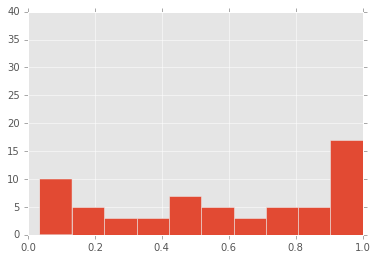

In [149]:
#positive plot
%matplotlib inline

pltpos = plt.hist(probspos)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 5 (neg)

In [129]:
print subset5[0:1]

              0         1   doc  truelabel
96719  0.258636  0.741364  9041          0


In [150]:
#subset to the only column being that of the probabilities of the true label
probsneg = subset5[[0]]

[0.0, 1.0, 0.0, 40.0]

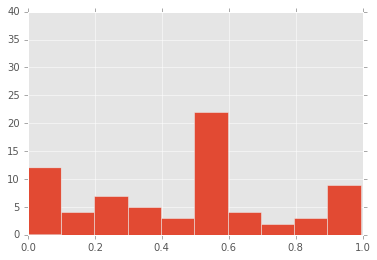

In [151]:
#negative plot
%matplotlib inline

pltneg = plt.hist(probsneg)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 6 (neg)

In [130]:
print subset6[0:1]

               0         1   doc  truelabel
102063  0.335907  0.664093  9559          0


In [152]:
#subset to the only column being that of the probabilities of the true label
probsneg = subset6[[0]]

[0.0, 1.0, 0.0, 40.0]

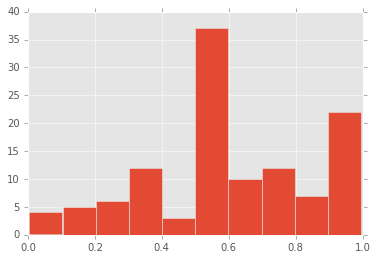

In [153]:
#negative plot
%matplotlib inline

pltneg = plt.hist(probsneg)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 7 (pos)

In [135]:
print subset7[0:1]

               0         1   doc  truelabel
105097  0.122349  0.877651  9836          1


In [154]:
#subset to the only column being that of the probabilities of the true label
probspos = subset7[[1]]

[0.0, 1.0, 0.0, 40.0]

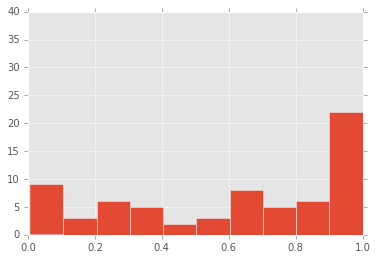

In [155]:
#positive plot
%matplotlib inline

pltpos = plt.hist(probspos)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])

## Plot 8 (pos)

In [156]:
print subset8[0:1]

          0    1    doc  truelabel
124330  0.5  0.5  11675          1


In [157]:
#subset to the only column being that of the probabilities of the true label
probspos = subset8[[1]]

[0.0, 1.0, 0.0, 40.0]

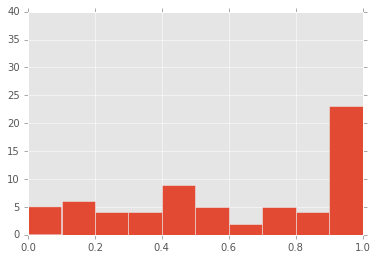

In [158]:
#positive plot
%matplotlib inline

pltpos = plt.hist(probspos)
#plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
#plt.xlabel("Probabilities assigned to sentences of being negative")
#plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,40.0])